#Exploratory Data Analysis

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
dataset = pd.read_csv('mtsamples.csv')
dataset.drop(dataset.columns[[0]],axis=1)

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
3672,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
3673,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
3674,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
3675,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [190]:
dataset.head(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [191]:

print(len(dataset))

3677


In [192]:
dataset['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [193]:
len(dataset['medical_specialty'].unique())

30

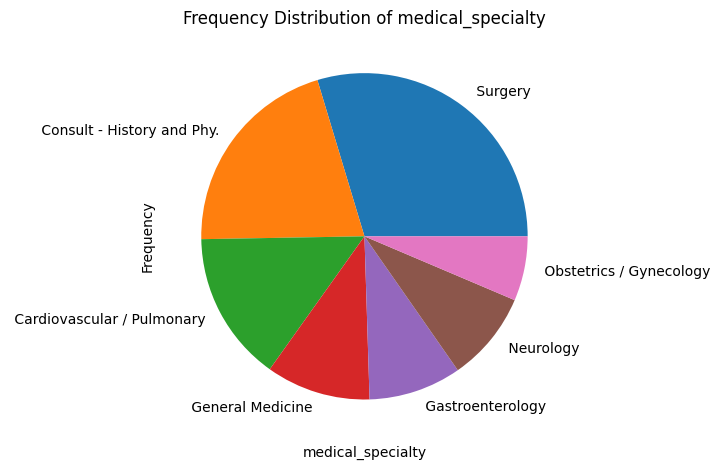

In [194]:
freq_table = dataset['medical_specialty'].value_counts().nlargest(7)

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

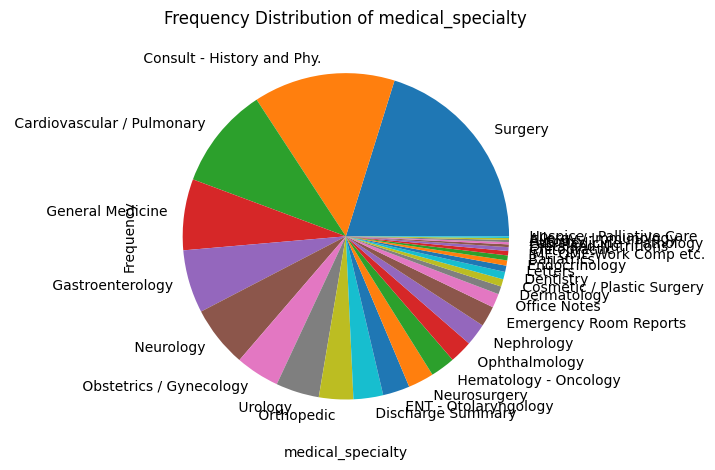

In [195]:
freq_table = dataset['medical_specialty'].value_counts()

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [196]:
#df_keepkeywords for all the rows in the datset
df_keepkeywords_all = dataset.drop(dataset.columns[[0, 1, 3,4]], axis=1)
df_keepkeywords_all

,medical_specialty,keywords
0,Allergy / Immunology,"allergy / immunology, allergic rhinitis, aller..."
1,Bariatrics,"bariatrics, laparoscopic gastric bypass, weigh..."
2,Bariatrics,"bariatrics, laparoscopic gastric bypass, heart..."
3,Cardiovascular / Pulmonary,"cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,Cardiovascular / Pulmonary,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...
3672,Allergy / Immunology,NaN
3673,Allergy / Immunology,"allergy / immunology, mucous membranes, conjun..."
3674,Allergy / Immunology,NaN
3675,Allergy / Immunology,NaN


In [197]:

# Get the column to shift
col_to_shift = df_keepkeywords_all['medical_specialty']
# Drop the column from its current position
df_keepkeywords_all = df_keepkeywords_all.drop('medical_specialty', axis=1)
# Insert the column at a new position
new_position = 1  # set the new position of the column
df_keepkeywords_all.insert(new_position, 'medical_specialty', col_to_shift)
df_keepkeywords_all.head(5)

,keywords,medical_specialty
0,"allergy / immunology, allergic rhinitis, aller...",Allergy / Immunology
1,"bariatrics, laparoscopic gastric bypass, weigh...",Bariatrics
2,"bariatrics, laparoscopic gastric bypass, heart...",Bariatrics
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",Cardiovascular / Pulmonary
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",Cardiovascular / Pulmonary


In [198]:
df_keepkeywords_all.head(5)

,keywords,medical_specialty
0,"allergy / immunology, allergic rhinitis, aller...",Allergy / Immunology
1,"bariatrics, laparoscopic gastric bypass, weigh...",Bariatrics
2,"bariatrics, laparoscopic gastric bypass, heart...",Bariatrics
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",Cardiovascular / Pulmonary
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",Cardiovascular / Pulmonary


#Check for missing values
 1. Drop rows which contain ```nan``` values
 2. Replace the values in ```medical_specialty``` with values ```8``` and above with ```8```
 * Intuition: Here the value ```8``` represents ```others```

In [199]:
df_keepkeywords_all.isnull().any()
# There are some rows where keyword contained is NaN
#So, dropping the rows which contain Null values in keywords

keywords              True
medical_specialty    False
dtype: bool

In [200]:
df_keepkeywords_all=df_keepkeywords_all.dropna()
df_keepkeywords_all=df_keepkeywords_all.reset_index(drop=True)

In [201]:
df_keepkeywords_all

,keywords,medical_specialty
0,"allergy / immunology, allergic rhinitis, aller...",Allergy / Immunology
1,"bariatrics, laparoscopic gastric bypass, weigh...",Bariatrics
2,"bariatrics, laparoscopic gastric bypass, heart...",Bariatrics
3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",Cardiovascular / Pulmonary
4,"cardiovascular / pulmonary, 2-d, doppler, echo...",Cardiovascular / Pulmonary
...,...,...
2799,"bariatrics, laparoscopic gastric bypass, gastr...",Bariatrics
2800,"bariatrics, jenny craig, medifast, nutrisystem...",Bariatrics
2801,"bariatrics, elective surgical weight loss, sur...",Bariatrics
2802,"allergy / immunology, chronic glossitis, xeros...",Allergy / Immunology


In [202]:


# Get the column with string labels
label_col =  df_keepkeywords_all['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepkeywords_all['medical_specialty'] = label_encoded

In [203]:
# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{' Allergy / Immunology': 0, ' Bariatrics': 1, ' Cardiovascular / Pulmonary': 2, ' Chiropractic': 3, ' Consult - History and Phy.': 4, ' Cosmetic / Plastic Surgery': 5, ' Dentistry': 6, ' Dermatology': 7, ' Diets and Nutritions': 8, ' Discharge Summary': 9, ' ENT - Otolaryngology': 10, ' Emergency Room Reports': 11, ' Endocrinology': 12, ' Gastroenterology': 13, ' General Medicine': 14, ' Hematology - Oncology': 15, ' Hospice - Palliative Care': 16, ' IME-QME-Work Comp etc.': 17, ' Lab Medicine - Pathology': 18, ' Letters': 19, ' Nephrology': 20, ' Neurology': 21, ' Neurosurgery': 22, ' Obstetrics / Gynecology': 23, ' Office Notes': 24, ' Ophthalmology': 25, ' Orthopedic': 26, ' Surgery': 27, ' Urology': 28}


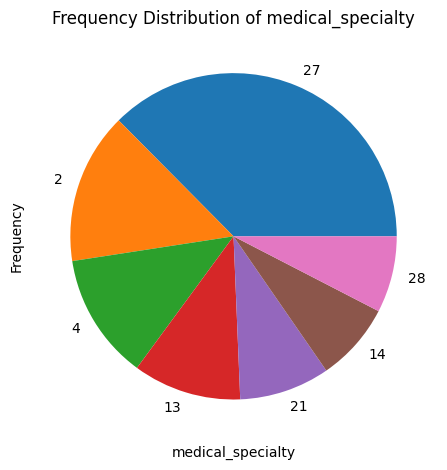

In [204]:
freq_table = df_keepkeywords_all['medical_specialty'].value_counts().nlargest(7)

freq_table.plot(kind='pie')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The Top 7 medical specialties are:
Here EV stands for encoded value which we get after using the Label Encoder



EV  Medical Specialty    

27 Surgery  

4 Consult- History and Phy.

2 Cardiovascular/ Pulmonary 

14 General Medicine

13 Gastroenterology

21 Neurology

23 Obstetrics/ Gynecology


Replacing the vaues 8 and above in ```medical_specialty``` with 8

In [205]:
df_keepkeywords_all['medical_specialty'] = df_keepkeywords_all['medical_specialty'].apply(lambda x: 8 if x not in [27,4,2,14,13,21,23] else x)

In [206]:


# Get the column with string labels
label_col =  df_keepkeywords_all['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepkeywords_all['medical_specialty'] = label_encoded

In [207]:

# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{2: 0, 4: 1, 8: 2, 13: 3, 14: 4, 21: 5, 23: 6, 27: 7}


So the mapping becomes:
```{2: 0, 4: 1, 8: 2, 13: 3, 14: 4, 21: 5, 23: 6, 27: 7}```

Which means:
```
0- Cardiovascular/ Pulmonary
1- Consult- History and Phy.
2- Others
3- Gastroenterology
4- General Medicine
5- Neurology
6- Obstetrics/ Gynecology
7- Surgery
```

# Checking the composition of the dataset

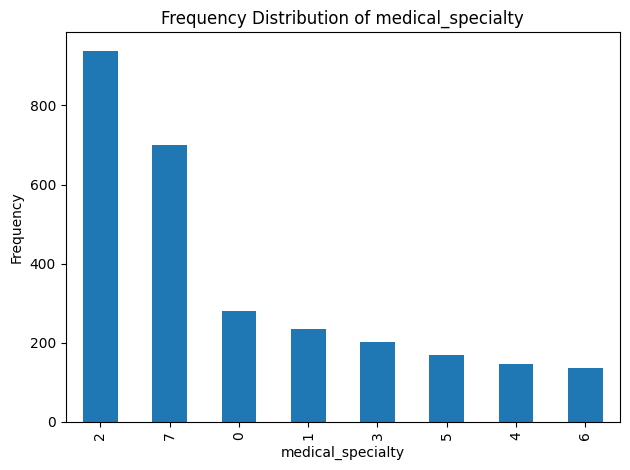

In [208]:
freq_table = df_keepkeywords_all['medical_specialty'].value_counts()

freq_table.plot(kind='bar')

plt.title('Frequency Distribution of medical_specialty')
plt.xlabel('medical_specialty')
plt.ylabel('Frequency')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [209]:
df_keepkeywords_all.to_csv('df_keepkeywords_all.csv', index=True)

#Text Cleaning and Preprocessing

In [210]:
df_keepkeywords = pd.read_csv('df_keepkeywords_all.csv')

In [211]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
df_keepkeywords['keywords'] = df_keepkeywords['keywords'].astype(str)
for i in range(0, len(df_keepkeywords)):
  keyword = re.sub('[^a-zA-Z]', ' ', df_keepkeywords['keywords'][i])
  keyword = keyword.lower()
  keyword = keyword.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  keyword = [ps.stem(word) for word in keyword if not word in set(all_stopwords)]
  keyword = ' '.join(keyword)
  corpus.append(keyword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Encoding the Dependent Variable- ```medical_specialty```

In [212]:
from sklearn.preprocessing import LabelEncoder

# Get the column with string labels
label_col =  df_keepkeywords['medical_specialty']

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the label column
label_encoded = label_encoder.fit_transform(label_col)

# Replace the string column with the encoded column
df_keepkeywords['medical_specialty'] = label_encoded

Get the Mapping

In [213]:
# Get the mapping of string labels to integer labels
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mapping
print(label_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}


In [214]:
df_keepkeywords

,Unnamed: 0,keywords,medical_specialty
0,0,"allergy / immunology, allergic rhinitis, aller...",2
1,1,"bariatrics, laparoscopic gastric bypass, weigh...",2
2,2,"bariatrics, laparoscopic gastric bypass, heart...",2
3,3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",0
4,4,"cardiovascular / pulmonary, 2-d, doppler, echo...",0
...,...,...,...
2799,2799,"bariatrics, laparoscopic gastric bypass, gastr...",2
2800,2800,"bariatrics, jenny craig, medifast, nutrisystem...",2
2801,2801,"bariatrics, elective surgical weight loss, sur...",2
2802,2802,"allergy / immunology, chronic glossitis, xeros...",2


#Creating Bag of Words Model

In [215]:
df_keepkeywords

,Unnamed: 0,keywords,medical_specialty
0,0,"allergy / immunology, allergic rhinitis, aller...",2
1,1,"bariatrics, laparoscopic gastric bypass, weigh...",2
2,2,"bariatrics, laparoscopic gastric bypass, heart...",2
3,3,"cardiovascular / pulmonary, 2-d m-mode, dopple...",0
4,4,"cardiovascular / pulmonary, 2-d, doppler, echo...",0
...,...,...,...
2799,2799,"bariatrics, laparoscopic gastric bypass, gastr...",2
2800,2800,"bariatrics, jenny craig, medifast, nutrisystem...",2
2801,2801,"bariatrics, elective surgical weight loss, sur...",2
2802,2802,"allergy / immunology, chronic glossitis, xeros...",2


In [216]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 150)
X = cv.fit_transform(corpus).toarray()
y =  df_keepkeywords.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [218]:
# Resample the dataset
X_train_resampled, y_train_resampled = resample(X_train, y_train, stratify=y_train, random_state=42)


# Training the  Multinomial Naive Bayes model on the Training set

In [219]:
# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_resampled, y_train_resampled)



MultinomialNB()

# Evaluate Multinomial Naive Bayes classifier

In [220]:
# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        60
           1       0.85      0.88      0.86        50
           2       0.83      0.59      0.69       194
           3       0.74      0.86      0.79        36
           4       0.80      0.92      0.86        26
           5       0.51      0.93      0.66        41
           6       0.76      0.97      0.85        32
           7       0.78      0.74      0.76       122

    accuracy                           0.76       561
   macro avg       0.76      0.85      0.79       561
weighted avg       0.78      0.76      0.76       561



#Creating a Confusion Matrix after using Multinomial NB

In [221]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 54   0   4   0   0   2   0   0]
 [  0  44   5   0   0   1   0   0]
 [  6   5 115   9   5  25   5  24]
 [  0   1   0  31   0   1   1   2]
 [  0   0   1   0  24   1   0   0]
 [  0   0   2   0   1  38   0   0]
 [  0   0   1   0   0   0  31   0]
 [  7   2  10   2   0   7   4  90]]


0.7611408199643493

# Running a Naive Bayes Classifier

In [222]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Evaluate Naive Bayes Classifier

In [223]:
# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59        60
           1       0.78      0.80      0.79        50
           2       0.78      0.27      0.40       194
           3       0.58      0.97      0.73        36
           4       0.25      0.81      0.38        26
           5       0.26      0.76      0.39        41
           6       0.36      0.88      0.51        32
           7       0.48      0.13      0.21       122

    accuracy                           0.47       561
   macro avg       0.51      0.66      0.50       561
weighted avg       0.59      0.47      0.44       561



#Creating the Confusion Matrix after using Naive Bayes Classifier

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  0  2  0 19  1  0  0]
 [ 0 40  1  0  4  5  0  0]
 [10  1 52 15 32 50 20 14]
 [ 0  0  0 35  0  1  0  0]
 [ 1  0  3  0 21  1  0  0]
 [ 1  4  4  0  1 31  0  0]
 [ 0  0  0  0  0  1 28  3]
 [18  6  5 10  8 30 29 16]]


0.46524064171123

#Using Non Conformist + Classifier

In [225]:
!pip install nonconformist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [226]:
from nonconformist.evaluation import class_mean_errors

In [227]:
from nonconformist.nc import ClassifierNc

In [228]:
from nonconformist.cp import IcpClassifier
from nonconformist.nc import NcFactory
from nonconformist.base import ClassifierAdapter
from nonconformist.nc import ClassifierNc, MarginErrFunc

In [229]:
from tabulate import tabulate   # Import tabulate function for tabular formatting

In [230]:
# Divide the data into proper training set, calibration set and test set
X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=0.2
)
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=0.25
)

In [231]:
# Create an inductive conformal classifier
icp = IcpClassifier(ClassifierNc(ClassifierAdapter(MultinomialNB()),MarginErrFunc()))
# Fit the ICP using the proper training set
icp.fit(X_train, y_train)
# Calibrate the ICP using the calibration set
icp.calibrate(X_cal, y_cal)

# There are a total of 8 labels

```
0- Cardiovascular/ Pulmonary
1- Consult- History and Phy.
2- Others
3- Gastroenterology
4- General Medicine
5- Neurology
6- Obstetrics/ Gynecology
7- Surgery
```

In [232]:
prediction = icp.predict(X_test, significance=0.1)

predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1].round(3)
credibility = predictions[:, 2].round(3)

y_pred = predictions[:, 0].astype(int)

header = np.array(['c0-label', 'c1-label', 'c2-label','c3-label','c4-label','c5-label','c6-label','c7-label',
                   'c0-value', 'c1-value','c2-value','c3-value','c4-value','c5-value','c6-value','c7-value', 
                   'conf', 'cred', 'y-test','y-pred'])

label_map = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Neurology', 6: 'Obstetrics/ Gynecology', 7: 'Surgery'}
# Define a function that maps integer labels to categorical names using the label_map
label_mapper = np.vectorize(lambda label: label_map[label])
# Use the label_mapper function to map the integer labels in y to categorical names
prediction_categorical = label_mapper(prediction)
y_label_names = label_mapper(y_pred)

table = np.vstack([prediction_categorical.T, prediction.T, confidence, credibility, y_label_names, y_pred]).T

df = pd.DataFrame(np.vstack([header, table]))
print(df)


                            0                          1   \
0                     c0-label                   c1-label   
1    Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
2    Cardiovascular/ Pulmonary  Consult- History and Phy.   
3    Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
4    Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
..                         ...                        ...   
557  Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
558  Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
559  Consult- History and Phy.  Consult- History and Phy.   
560  Consult- History and Phy.  Consult- History and Phy.   
561  Consult- History and Phy.  Consult- History and Phy.   

                            2                          3   \
0                     c2-label                   c3-label   
1    Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
2    Cardiovascular/ Pulmonary  Cardiovascular/ Pulmonary   
3    Consult- History a

In [233]:
prediction

array([[False, False, False, ...,  True, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [234]:
print(df.to_string(index=False, header=False))

                 c0-label                  c1-label                  c2-label                  c3-label                  c4-label                  c5-label                  c6-label                  c7-label c0-value c1-value c2-value c3-value c4-value c5-value c6-value c7-value  conf  cred                    y-test y-pred
Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Consult- History and Phy. Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary    False    False    False    False    False     True    False    False 0.997 0.955                 Neurology      5
Cardiovascular/ Pulmonary Consult- History and Phy. Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary Cardiovascular/ Pulmonary    False     True    False    False    False    False    False    False 0.906 0.458 Consult- History and Phy.      1
Cardiovascular/ Pulmonary

```
label_map = {0: 'Cardiovascular/ Pulmonary', 1: 'Consult- History and Phy.', 2: 'Others', 3: 'Gastroenterology', 4: 'General Medicine', 5: 'Neurology', 6: 'Obstetrics/ Gynecology', 7: 'Surgery'}

```

In [235]:
cardio_count = 0
consult_count = 0
others_count = 0
gastro_count = 0
genmed_count = 0
neuro_count = 0
gynec_count=0
surgery_count=0

# Loop over each predicted label and update the corresponding counter
for label in y_label_names:
    if label == 'Cardiovascular/ Pulmonary':
        cardio_count += 1
    elif label == 'Consult- History and Phy.':
        consult_count += 1
    elif label == 'Others':
        others_count += 1
    elif label == 'Gastroenterology':
        gastro_count += 1
    elif label == 'General Medicine':
        genmed_count += 1    
    elif label == 'Neurology':
        neuro_count += 1
    elif label == 'Obstetrics/ Gynecology':
        gynec_count += 1
    elif label == 'Surgery':
        surgery_count += 1

# Print the results
print(f'Cardiovascular/ Pulmonary: {cardio_count}')
print(f'Consult- History and Phy.: {consult_count}')
print(f'Others: {others_count}')
print(f'Gastroenterology: {gastro_count}')
print(f'General Medicine: {genmed_count}')
print(f'Neurology: {neuro_count}')
print(f'Obstetrics/ Gynecology count: {gynec_count}')
print(f'Surgery count: {surgery_count}')


Cardiovascular/ Pulmonary: 67
Consult- History and Phy.: 58
Others: 117
Gastroenterology: 46
General Medicine: 39
Neurology: 39
Obstetrics/ Gynecology count: 56
Surgery count: 139


In [236]:
error_rate1 = class_mean_errors(icp.predict(X_test), y_test, significance=0.1)
print('Error rate 1: {}'.format(error_rate1))


error_rate2 = class_mean_errors(icp.predict(X_test), y_test, significance=0.2)
print('Error rate 2: {}'.format(error_rate2))


error_rate3 = class_mean_errors(icp.predict(X_test), y_test, significance=0.6)
print('Error rate 3: {}'.format(error_rate3))



error_rate4 = class_mean_errors(icp.predict(X_test), y_test, significance=0.8)
print('Error rate 4: {}'.format(error_rate4))

Error rate 1: 0.13012477718360071
Error rate 2: 0.22638146167557938
Error rate 3: 0.6381461675579323
Error rate 4: 0.7914438502673797


In [237]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict confidence and credibility
predictions = icp.predict_conf(X_test)
confidence = predictions[:, 1]
credibility = predictions[:, 2]


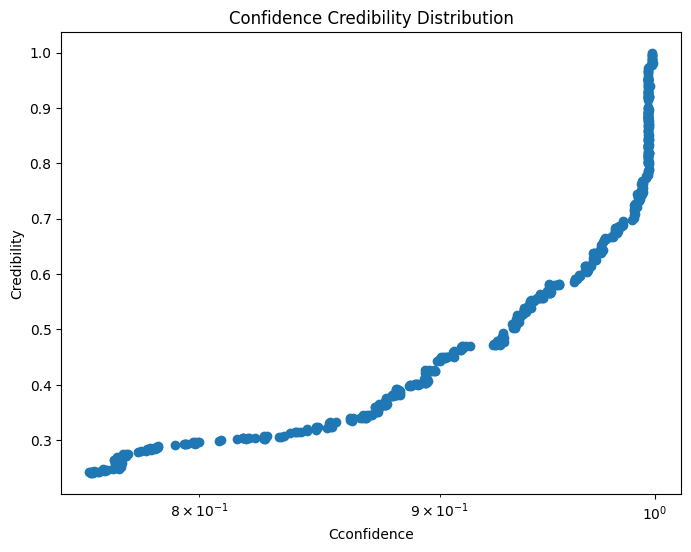

In [238]:
# Plot credibility
plt.figure(figsize=(8, 6))
plt.scatter(confidence,credibility)
plt.xscale("log")

plt.xlabel('Cconfidence')
plt.ylabel('Credibility')
plt.title('Confidence Credibility Distribution')
plt.show()

Create a map with keys being the encoded values and values being the medical speciality

In [239]:
medical_specialty = {
0: 'Cardiovascular/ Pulmonary',
1: 'Consult- History and Phy.',
2: 'Others',
3: 'Gastroenterology',
4: 'General Medicine',
5: 'Neurology',
6: 'Obstetrics/ Gynecology',
7: 'Surgery'
}

In [240]:
# Produce nonconformity scores for the test set
nc_scores = icp.predict(X_test, significance=0.20)

# Obtain a set prediction for the test set
set_prediction = icp.predict(X_test, significance=None)

# Tabulate the nc_scores, set_prediction, and predicted label values side by side
table = []
for i, (nc_score, set_pred) in enumerate(zip(nc_scores, set_prediction)):
    predicted_label = medical_specialty[np.argmax(set_pred)]
    table.append([i+1, nc_score, set_pred, predicted_label])

headers = ['Instance', 'nc_score', 'set_prediction', 'predicted_label']
print(tabulate(table, headers=headers))

  Instance  nc_score                                           set_prediction                                                      predicted_label
----------  -------------------------------------------------  ------------------------------------------------------------------  -------------------------
         1  [False False False False False  True False False]  [0.00248899 0.00273081 0.00345873 0.00296371 0.0032621  0.95487355  Neurology
                                                                0.0021181  0.00332297]
         2  [False  True False False False False False False]  [0.07200281 0.45845118 0.09296004 0.07148839 0.0934862  0.07202742  Consult- History and Phy.
                                                                0.07267315 0.07258036]
         3  [False False  True False False False False False]  [0.05535751 0.05616127 0.48967179 0.05633522 0.05674854 0.05615744  Others
                                                                0.05594546 0.07221695]